In [1]:
import numpy as np
from scipy import integrate
import pandas as pd
from matplotlib import pyplot as plt
import glob

In [2]:
plt.style.use('science')


SMALL_SIZE = 9
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize
# plt.rc('legend', titlesize=5)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
coloursk = ['#003f5c','#bc5090' ,'#ffa600']
coloursa = ['#003f5c','#7a5195' ,'#ef5675', '#ffa600']
# colours = ['#ebe831','#ffae2f' ,'#ff725c']
leg_labelsk = ['$T_\\text{kin}^\infty$ = 100K', '$T_\\text{kin}^\infty$ = 1000K' , '$T_\\text{kin}^\infty$ = 1880K']
leg_labelsa = ['$T_\\text{kin}^\infty$ = 100K', '$T_\\text{kin}^\infty$ = 1000K' , '$T_\\text{kin}^\infty$ = 1880K', '$T_\\text{kin}^\infty$ = 2440K']
lss = [':','-', '--', '-.']

In [4]:
kheatfiles = glob.glob('*_kinheat_tt.dat')
files_eq_ahfd = glob.glob('*CA_eq_time_AHFD.dat')

kheat_data = {}
ahfd_data = {}

for file in kheatfiles:
    kheat_data[file.replace('_kinheat_tt.dat', '')] = pd.read_csv(file, sep="\t", header = None)
    

for file in files_eq_ahfd:
    ahfd_data[file.replace('CA_eq_time_AHFD.dat', '')] = pd.read_csv(file, sep="\t", header = None)


In [24]:
kheat_data

{'d1':                 0             1             2              3
 0        0.000016  2.238206e+03  2.238206e-01       0.017917
 1        0.000020  3.321722e+03  3.321722e-01       0.026591
 2        0.000025  5.757620e+03  5.757620e-01       0.046091
 3        0.000032  9.228547e+03  9.228547e-01       0.073876
 4        0.000040  1.450814e+04  1.450814e+00       0.116140
 5        0.000050  2.343928e+04  2.343928e+00       0.187635
 6        0.000063  3.641027e+04  3.641027e+00       0.291469
 7        0.000079  5.800799e+04  5.800799e+00       0.464362
 8        0.000100  9.167858e+04  9.167858e+00       0.733899
 9        0.000126  1.452855e+05  1.452855e+01       1.163030
 10       0.000158  2.306476e+05  2.306476e+01       1.846365
 11       0.000200  3.670675e+05  3.670675e+01       2.938425
 12       0.000251  5.791465e+05  5.791465e+01       4.636146
 13       0.000316  9.215956e+05  9.215956e+01       7.377496
 14       0.000398  1.453885e+06  1.453885e+02      11.638547
 1

ValueError: x and y must have same first dimension, but have shapes (99,) and (197,)

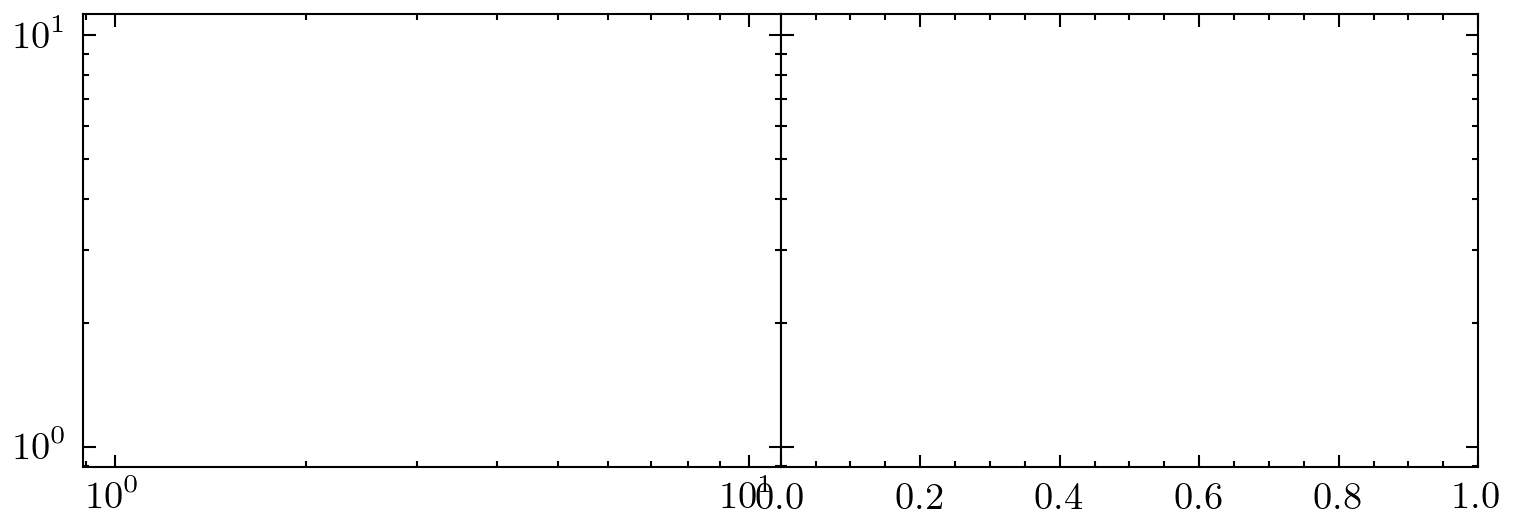

In [23]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (6,2), dpi = 300 ,sharey = True)
fig.subplots_adjust(hspace=0, wspace=0)

ax[0].loglog(kheat_data['d1'][0], kheat_data['d4'][1]+ahfd_data['d4'][1], color = '#006a9c')
ax[0].set_ylabel('t [years]' )
ax[0].grid(b=True, which='major',  linestyle='--', alpha=0.2)
ax[0].axhline(10**10, color = 'black', alpha = 0.3, linestyle = '--')

# # ax[0,1].plot(eos_data[[names[0]]], eos_data[[names[3]]], color = '#f0bc02')
# # ax[0,1].plot(eos_data[[names[0]]], eos_data[[names[4]]], color = '#43b859')
# # ax[0,1].plot(eos_data[[names[0]]], eos_data[[names[5]]], color = '#0097a1')
# ax[0,1].plot(eos_data[[names[0]]], eos_data[[names[6]]], color = '#006a9c')
# # ax[0,1].set_yscale('log')
# ax[0,1].set_ylabel('$Y_n$')
# ax[0,1].axvline(11.6, color = 'black', alpha = 0.3, linestyle = ':')
# ax[0,1].yaxis.set_label_position("right")
# ax[0,1].yaxis.tick_right()

ax[1].loglog(kheat_data['d1'][0], kheat_data['d4'][1], color = '#006a9c')
ax[1].grid(b=True, which='major',  linestyle='--', alpha=0.2)
ax[1].axhline(10**10, color = 'black', alpha = 0.3, linestyle = '--')

plt.show()